# Visualisations for recommendations.
# Using NLP to extract user preferences from reviews 

## Import packages

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mobar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading datasets 

In [2]:
# Load Recipe1M+ Dataset
recipe1m = pd.read_csv('datasets/full_dataset.csv')

# Load Food.com Recipes and User Interactions
pp_recipes = pd.read_csv('datasets/PP_recipes.csv')
pp_users = pd.read_csv('datasets/PP_users.csv')
raw_interactions = pd.read_csv('datasets/RAW_interactions.csv')
raw_recipes = pd.read_csv('datasets/RAW_recipes.csv')

# Load What's Cooking Dataset (JSON format)
with open('datasets/train.json') as f:
    whats_cooking_train = json.load(f)
whats_cooking_train = pd.DataFrame(whats_cooking_train)

with open('datasets/test.json') as f:
    whats_cooking_test = json.load(f)
whats_cooking_test = pd.DataFrame(whats_cooking_test)


# Extract User Preferences from Reviews (NLP)

In [11]:
raw_interactions.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

Yes theres reviews column in raw_interactions dataset

In [12]:
# Function to extract user preferences from reviews
def extract_user_preferences(reviews, stop_words):
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(reviews)
    feature_names = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1  
    preferences = pd.DataFrame({'word': feature_names, 'count': word_counts})
    preferences = preferences.sort_values(by='count', ascending=False)
    return preferences
user_preferences = extract_user_preferences(raw_interactions['review'].dropna(), stop_words)
# Display top 33 user preferences
print(user_preferences.head(33))


             word   count
114573     recipe  686565
90160        made  488727
142689       used  425995
135679     thanks  356126
90591        make  342420
71790       great  310886
70713        good  302178
137291       time  227120
58773        easy  220894
26100       added  206058
87508        like  195894
114208     really  195053
101784        one  173087
53822   delicious  170849
28090        also  167191
120555      sauce  164609
142676        use  159439
148402      would  158836
89077       loved  154501
88095      little  150780
96959        much  139905
43970     chicken  130283
65451      flavor  126619
98926        next  125847
26077         add  122267
79531     instead  115590
135648      thank  115347
89062        love  111832
43406      cheese  107714
123246    sharing  106255
134241      taste  105204
147803  wonderful  104723
136457      think  102298


# Visualize top user preferences

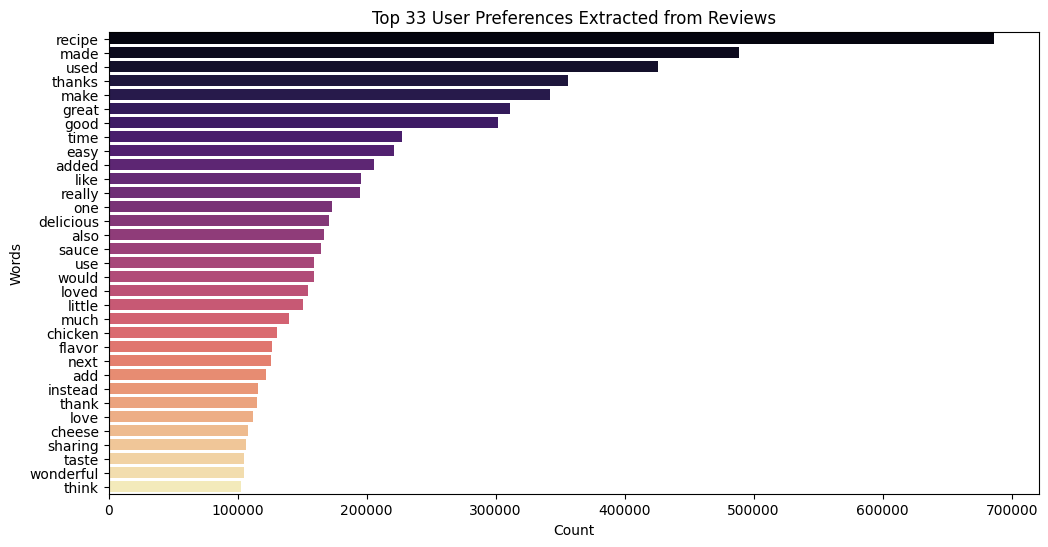

In [ ]:
def plot_user_preferences(preferences, top_n=33):
    top_preferences = preferences.head(top_n)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_preferences, x='count', y='word', palette="magma", hue='word', dodge=False)
    plt.title(f"Top {top_n} User Preferences Extracted from Reviews")
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.legend([], [], frameon=False) 
    plt.show()
plot_user_preferences(user_preferences)

# Most Common Ingredients in Recipes

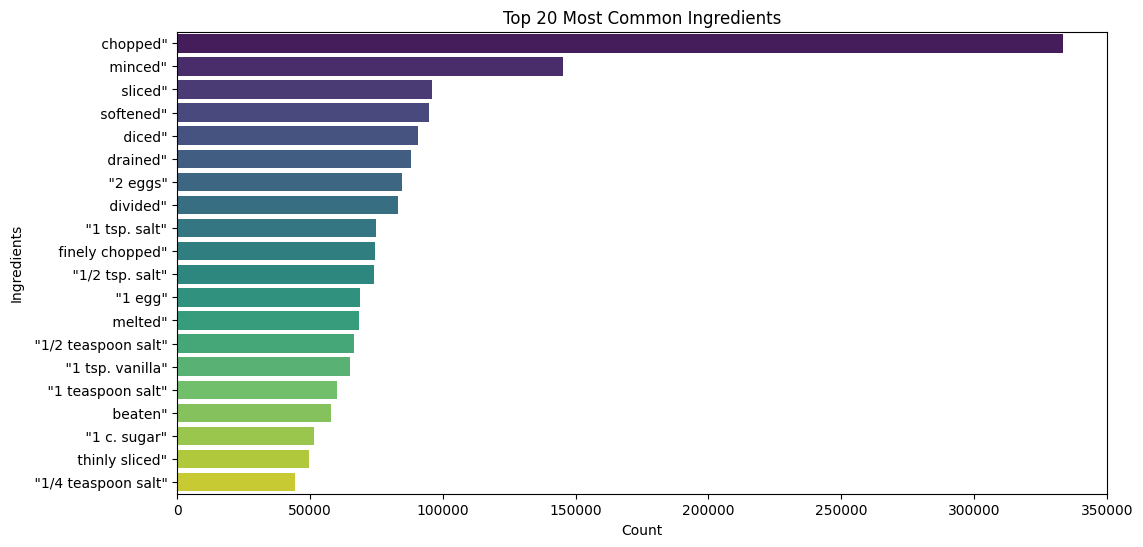

In [33]:
def plot_most_common_ingredients(df, column, top_n=20):
    all_ingredients = df[column].str.cat(sep=',').split(',')
    ingredient_counts = pd.Series(all_ingredients).value_counts().head(top_n)
    ingredient_counts_df = ingredient_counts.reset_index()
    ingredient_counts_df.columns = ['Ingredient', 'Count']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=ingredient_counts_df, x='Count', y='Ingredient', palette="viridis", hue='Ingredient', dodge=False)
    plt.title(f"Top {top_n} Most Common Ingredients")
    plt.xlabel('Count')
    plt.ylabel('Ingredients')
    plt.legend([], [], frameon=False)  
    plt.show()
plot_most_common_ingredients(recipe1m, 'ingredients')

# Recipe Counts by Time to Cook

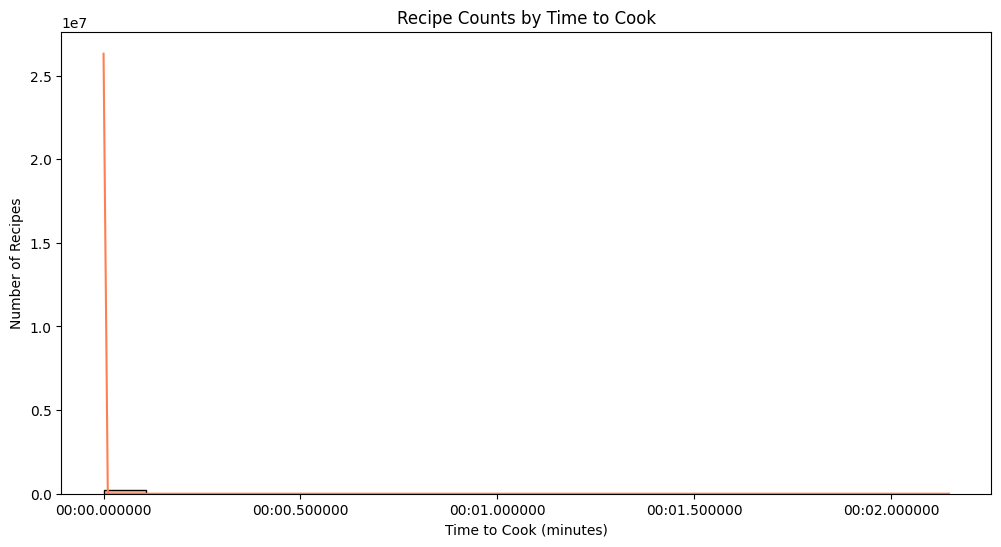

In [ ]:
def plot_recipe_counts_by_time_to_cook(df, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True, color='coral')
    plt.title("Recipe Counts by Time to Cook")
    plt.xlabel('Time to Cook (minutes)')
    plt.ylabel('Number of Recipes')
    plt.show()
plot_recipe_counts_by_time_to_cook(raw_recipes, 'min')

# Recipe Ratings Distribution

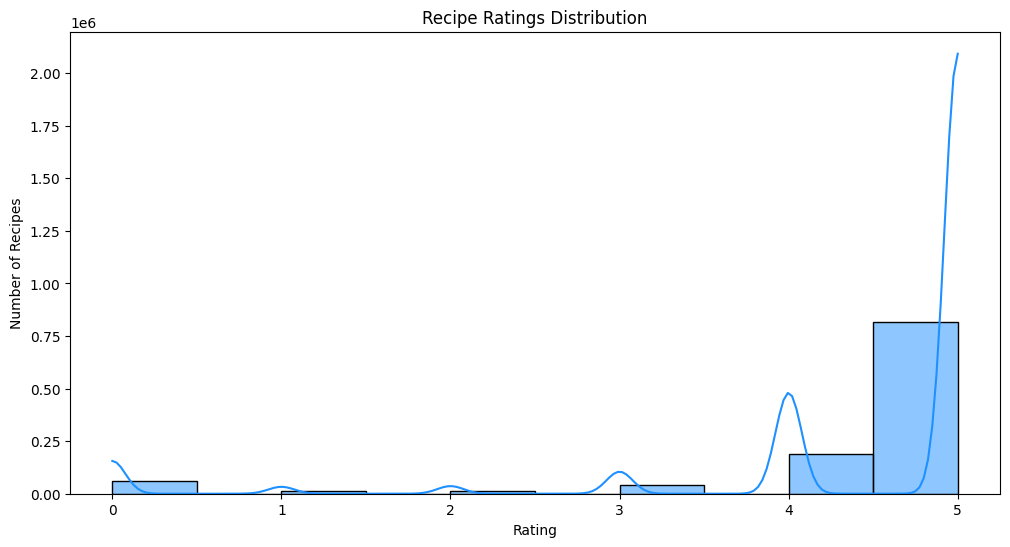

In [30]:
def plot_recipe_ratings_distribution(df, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=10, kde=True, color='dodgerblue')
    plt.title("Recipe Ratings Distribution")
    plt.xlabel('Rating')
    plt.ylabel('Number of Recipes')
    plt.show()
plot_recipe_ratings_distribution(raw_interactions, 'rating')


# Cuisine Distribution

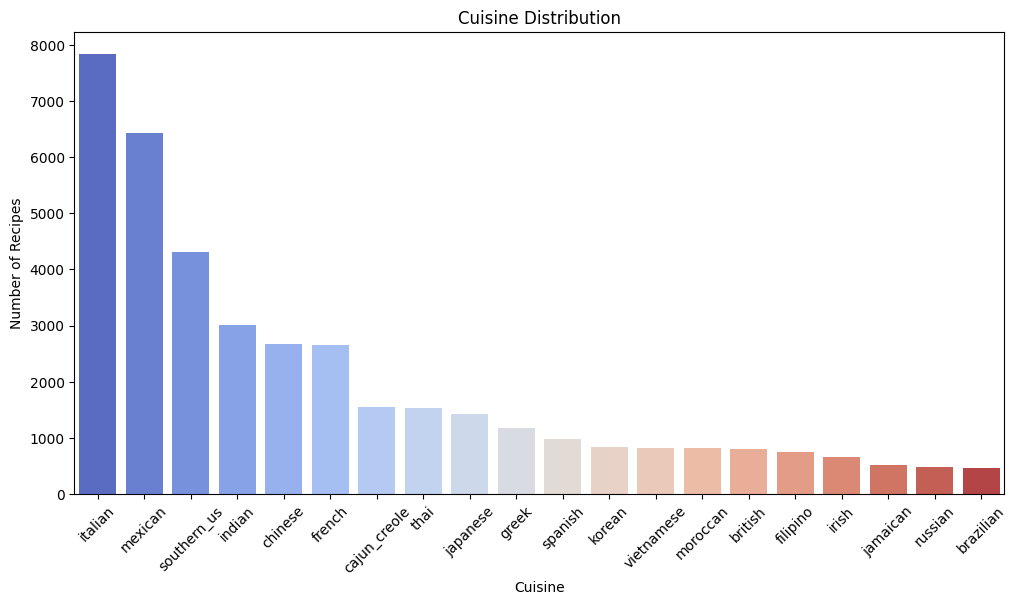

In [ ]:
def plot_cuisine_distribution(df, column):
    cuisine_counts = df[column].value_counts().reset_index()
    cuisine_counts.columns = ['Cuisine', 'Count']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=cuisine_counts, x='Cuisine', y='Count', palette="coolwarm", hue='Cuisine', dodge=False)
    plt.title("Cuisine Distribution")
    plt.xlabel('Cuisine')
    plt.ylabel('Number of Recipes')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  
    plt.show()
plot_cuisine_distribution(whats_cooking_train, 'cuisine')


# Visualize User Interactions Over Time

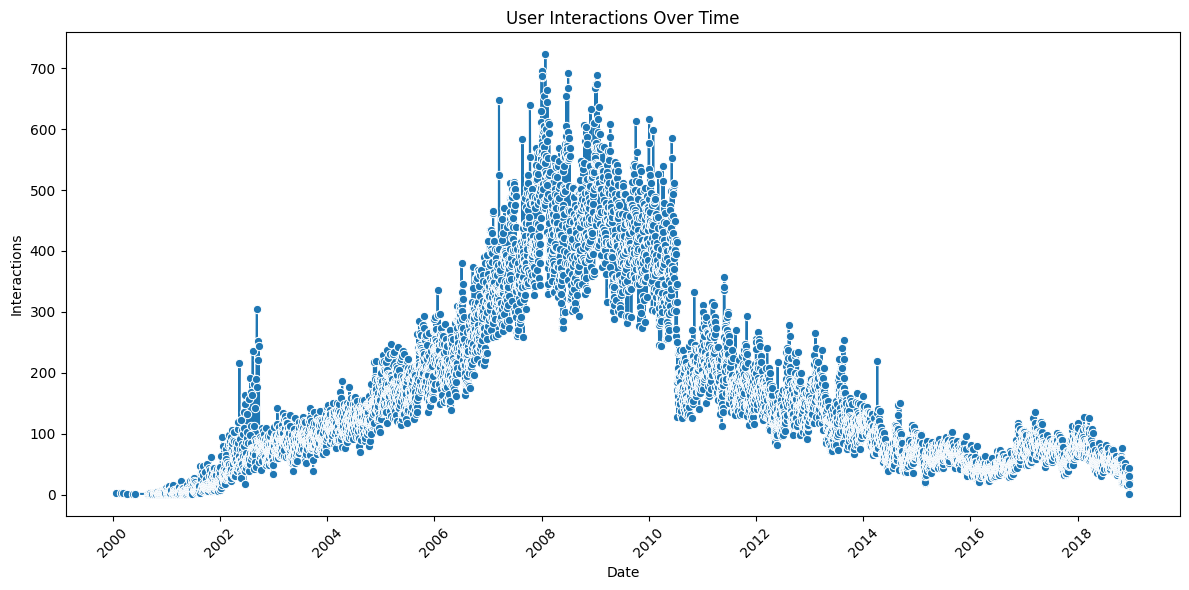

In [5]:
def plot_user_interactions_over_time(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    interactions_over_time = df[date_column].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=interactions_over_time.index, y=interactions_over_time.values, marker='o')
    plt.title("User Interactions Over Time")
    plt.xlabel('Date')
    plt.ylabel('Interactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_user_interactions_over_time(raw_interactions, 'date')


# Visualize Recipe Counts by Cuisine

C:\Users\mobar\AppData\Local\Temp\ipykernel_18552\3602815500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="coolwarm")


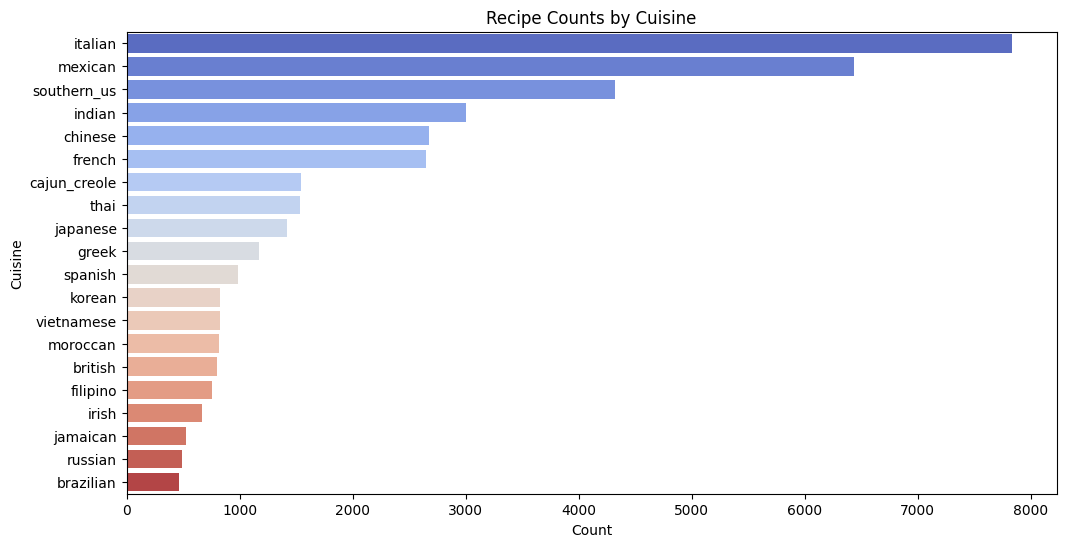

In [50]:
def plot_recipe_counts_by_cuisine(df, column='cuisine'):
    cuisine_counts = df[column].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="coolwarm")
    plt.title("Recipe Counts by Cuisine")
    plt.xlabel('Count')
    plt.ylabel('Cuisine')
    plt.show()
plot_recipe_counts_by_cuisine(whats_cooking_train, 'cuisine')  

# Recipe Diversity Index

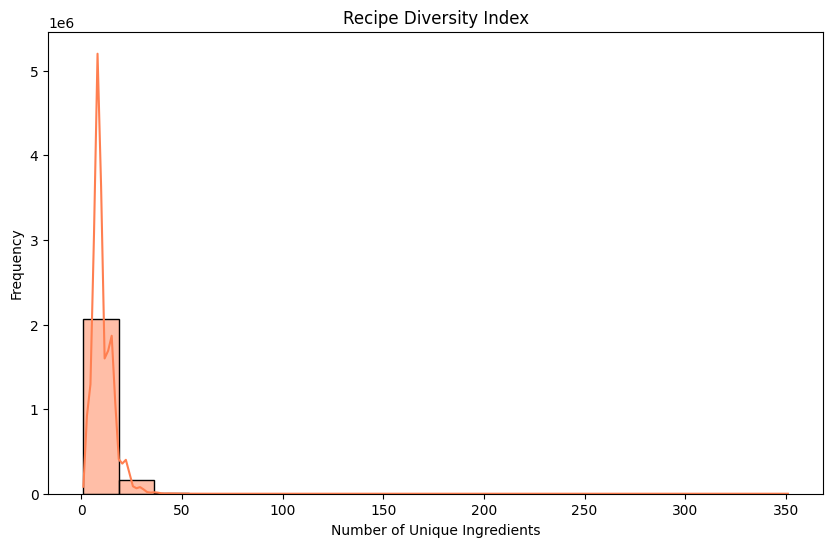

In [9]:
def recipe_diversity_index(df, column):
    df['ingredient_diversity'] = df[column].apply(lambda x: len(set(x.split(','))))
    plt.figure(figsize=(10, 6))
    sns.histplot(df['ingredient_diversity'], bins=20, kde=True, color='coral')
    plt.title('Recipe Diversity Index')
    plt.xlabel('Number of Unique Ingredients')
    plt.ylabel('Frequency')
    plt.show()
recipe_diversity_index(recipe1m, 'ingredients')

# Ingredient Frequency Over Time

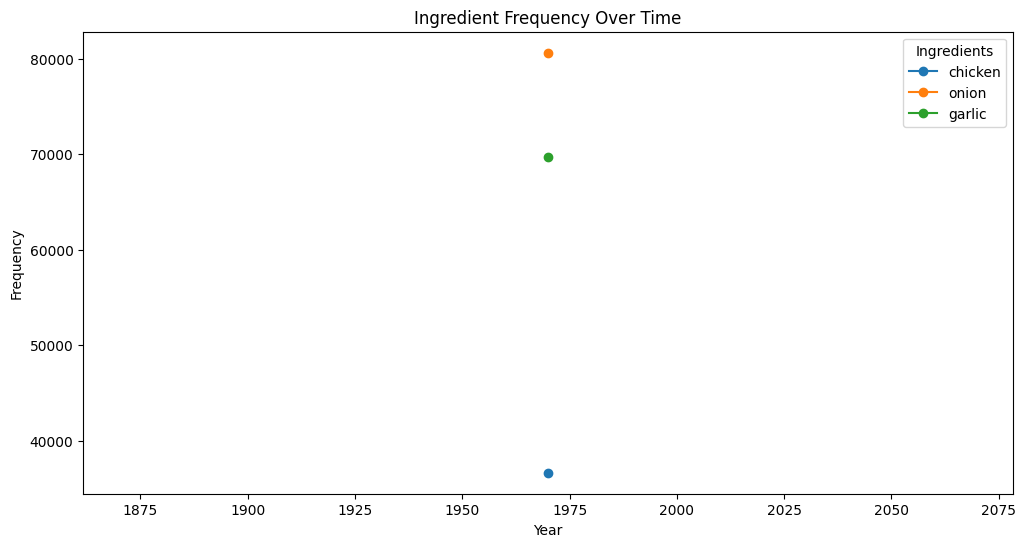

In [13]:
# Track the popularity of certain ingredients over time
def ingredient_frequency_over_time(df, date_column, ingredient_column, top_ingredients):
    df[date_column] = pd.to_datetime(df[date_column])
    df['year'] = df[date_column].dt.year

    ingredient_trends = pd.DataFrame()
    for ingredient in top_ingredients:
        ingredient_trends[ingredient] = df[df[ingredient_column].str.contains(ingredient)]['year'].value_counts().sort_index()

    ingredient_trends.fillna(0, inplace=True)
    ingredient_trends.plot(figsize=(12, 6), marker='o')
    plt.title('Ingredient Frequency Over Time')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend(title='Ingredients')
    plt.show()
top_ingredients = ['chicken', 'onion', 'garlic']  
ingredient_frequency_over_time(raw_recipes, 'minutes', 'ingredients', top_ingredients)

# User Interaction Heatmap

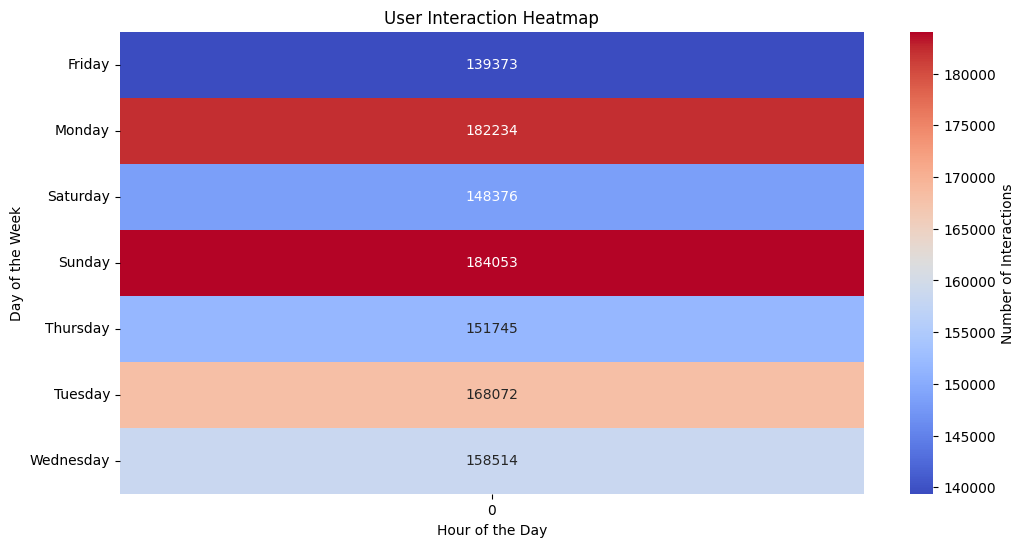

In [10]:
def user_interaction_heatmap(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['hour'] = df[date_column].dt.hour
    df['day'] = df[date_column].dt.day_name()
    
    heatmap_data = df.groupby(['day', 'hour']).size().unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Interactions'})
    plt.title('User Interaction Heatmap')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of the Week')
    plt.show()
user_interaction_heatmap(raw_interactions, 'date')